# Лабораторная работа №3 
## Смирнов Игорь
## 15 B-1
### Вариант №10

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

from sklearn import datasets
from sklearn.linear_model import perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.pylab import rc, plot


import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import pearsonr, spearmanr


data = pd.read_csv('airfoil_self_noise.dat.txt', sep="\t", header=None, 
                   names = ["Frequency","Angle of attack","Chord length","Free-stream velocity","displacement thickness","Scaled sound pressure level"])
data.head()

c:\users\gosha\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\gosha\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,Frequency,Angle of attack,Chord length,Free-stream velocity,displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
#### набор данных представляет собой различные профили и размеры крыльев самолётов NASA 
#### на различных скоростях, углах аттаки, аэродинамеческих туннелях 
##### Столбцы:
##### Frequency - Частота, в Герцах.
##### Angle of attack - Угол атаки, в градусах.
##### Chord length - Длина хорды, в метрах
##### Free-stream velocity - Скорость набегающего потока, в метрах в секунду.
##### displacement thickness - величина смещения со стороны забора воздуха.
##### Scaled sound pressure level - Масштабируемый уровень звукового давления, в децибелах.

## 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [2]:
data.shape

(1503, 6)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency                      1503 non-null int64
Angle of attack                1503 non-null float64
Chord length                   1503 non-null float64
Free-stream velocity           1503 non-null float64
displacement thickness         1503 non-null float64
Scaled sound pressure level    1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [4]:
data = data.drop_duplicates()
data = data.dropna()
data.shape

(1503, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency                      1503 non-null int64
Angle of attack                1503 non-null float64
Chord length                   1503 non-null float64
Free-stream velocity           1503 non-null float64
displacement thickness         1503 non-null float64
Scaled sound pressure level    1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 82.2 KB


## 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [6]:
numerical_columns = [i for i in data.columns if data[i].dtype.name != 'object']
categorial_columns = [i for i in data.columns if data[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'displacement thickness', 'Scaled sound pressure level']
categorial:  []


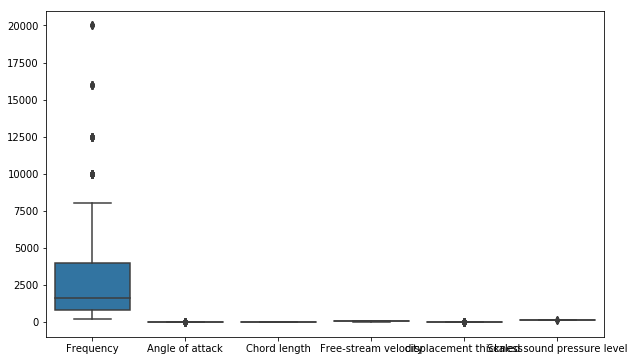

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[numerical_columns])
plt.show()

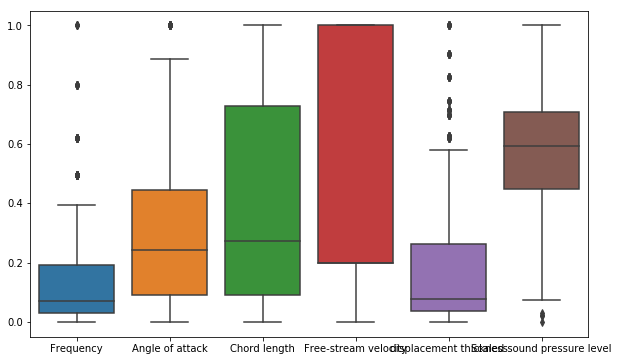

In [8]:
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
plt.figure(figsize=(10,6))
sns.boxplot(data=data[numerical_columns])
plt.show()

## 4.Выполните замену категориальных признаков
### категориальных признаков нет.

## 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

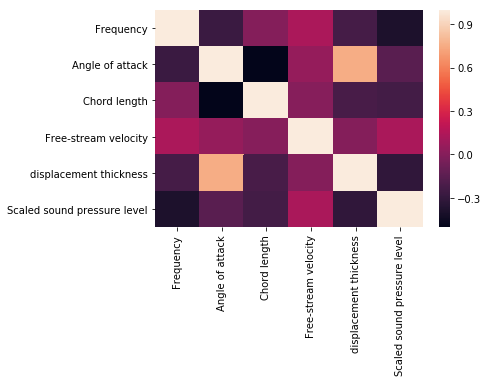

In [9]:
data_corr = data.corr()
sns.heatmap(data_corr)
plt.show()

In [10]:
data_corr

,Frequency,Angle of attack,Chord length,Free-stream velocity,displacement thickness,Scaled sound pressure level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle of attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-stream velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
displacement thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Scaled sound pressure level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


## 6.	Заполните пропущенные значения в данных;

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency                      1503 non-null float64
Angle of attack                1503 non-null float64
Chord length                   1503 non-null float64
Free-stream velocity           1503 non-null float64
displacement thickness         1503 non-null float64
Scaled sound pressure level    1503 non-null float64
dtypes: float64(6)
memory usage: 82.2 KB


### пропусков нет

## 7.	Решите поставленную задачу регрессии в соответствии с заданием. 


In [12]:
# разделим полученные данные на данные для обучения и теста
X, y = data.drop("displacement thickness", axis =1 ), data['displacement thickness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

51      0.001290
1465   -0.319112
184     0.089404
1000   -0.130949
746    -0.122374
1032    0.143931
925    -0.059177
394    -0.017434
597     0.061930
588     0.088145
765    -0.031170
141     0.096895
1121    0.067980
1061    0.119335
415     0.058512
Name: displacement thickness, dtype: float64


In [14]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.7766681083
spearmen correlation:  0.935554130775


In [15]:
import warnings
warnings.filterwarnings("ignore")

regr = linear_model.Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
regr_grid = GridSearchCV(regr, params)
regr_grid.fit(X_train, y_train)
best_alpha = regr_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.6


In [16]:
regr = linear_model.Ridge(alpha=best_alpha)
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

51      0.001507
1465   -0.321053
184     0.088394
1000   -0.126994
746    -0.118809
1032    0.144540
925    -0.060995
394    -0.017489
597     0.061765
588     0.088109
765    -0.028863
141     0.095970
1121    0.067953
1061    0.120040
415     0.057332
Name: displacement thickness, dtype: float64


In [17]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.776607064462
spearmen correlation:  0.935290979739
